# Исследование продаж компьютерных игр

**Цель: выявление компьютерных игр, пользующихся наибольшим спросом, прогноз продаж на следующий год, составление портрета пользователя разных регионов**


##### 1. Изучение общей информации:
* [1. Изученеие файлов с данными, получение общей информации, загрузка библиотек.](#datalearning)


##### 2. Подготовка данных:
* [2.1 Нахождение и исправление аномалий и ошибок.](#mistakes)
* [2.2 Нахождение и ликвидация пропусков.](#gap)
* [2.3 Приведение данных к нужным типам.](#type)
    
##### 3. Исследовательский анализ данных:
* [3.1 Платформы с наибольшими суммарными продажами.](#totalsales)
* [3.2 Потенциально прибыльные платформы.](#platforms)
* [3.3 Влияние отзывов пользователей и критиков на продажи.](#reviews)
* [3.4 Общее распределение игр по жанрам.](#genres)
    
#### 4. Портрет пользователя каждого региона
* [4.1 Северная Америка](#america)
* [4.2 Европа](#europe)
* [4.3 Япония](#japan)
    
#### 5. Проверка гипотез
* [5.1Проверка гипотезы о равенстве средних пользовательских рейтингов платформ Xbox One и PC.](#first)
* [5.2 Проверка гипотезы о равенстве средних пользовательских рейтингов жанров Action и Sports.](#second)

* [Общий вывод](#conclusion)
    

## 1. Изучение общей информации 

In [11]:
import pandas as pd
import numpy as np
data = pd.read_csv("C:/Users/kast1/Downloads/games.csv")

In [12]:
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [13]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.1+ MB


## Вывод

Названия столбцов необходимо привести к нижнему регистру, проверить, что за пропуски в столбцах и поменять тип данных.

## 2. Предобработка данных

### 2.1 Нахождение и исправление аномалий и ошибок.

In [15]:
#переименование столбцов
data.columns = ['name', 'platform','year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']

In [16]:
# tbd означает, что рейтинг пока не определен
data.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [17]:
#заменяю tbd на 0, т.к. для дальнейшей работы эти данные мне нужно перевести в числа
data.loc[data['user_score'] == 'tbd', 'user_score'] = 0

### 2.2 Нахождение и ликвидация пропусков.

In [18]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [ ]:
# проверяю пропуске в столбцах platform и genre
data['name'] = data['name'].fillna('неизвестно')

In [19]:
data.query('name == "неизвестно"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [20]:
data['genre'] = data['genre'].fillna('неизвестно')

In [21]:
# пропуски в годах меняю на 2020 год, как техническая замена, чтобы изменить тип данных
data['year_of_release'] = data['year_of_release'].fillna(2020)

In [22]:
data['rating'] = data['rating'].fillna('неизвестно')

In [23]:
data['user_score'] = data['user_score'].fillna(999999)

In [24]:
data['critic_score'] = data['critic_score'].fillna(999999)

### 2.3 Приведение данных к нужным типам.

In [ ]:
data['year_of_release'] = data['year_of_release'].astype('int')

In [25]:
data['user_score'] = data['user_score'].astype('float')

In [26]:
data.duplicated().sum()

0

In [27]:
# общие продажи для всех рынков
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,999999.0,999999.0,неизвестно,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,999999.0,999999.0,неизвестно,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,999999.0,999999.0,неизвестно,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,999999.0,999999.0,неизвестно,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,999999.0,999999.0,неизвестно,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,999999.0,999999.0,неизвестно,0.01


## Вывод

Все пропуски выявлены и заменены уникальными значениями, так как реальные значения получить не представляется возможным, а средние/медианные в данном случае не подходят. Данные приведены к нужному типу, можно приступать к анализу.

## 3.  Исследовательский анализ данных

### 3.1 Платформы с наибольшими суммарными продажами


In [28]:
grouped_by_year = data.groupby('year_of_release')['name'].count()
grouped_by_year

year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
2020.0     269
Name: name, dtype: int64

*Последние 5 лет наблюдается спад.Игры за 2000-е годы и раньше нет смысла учитывать, там были совсем другое количество выпускаемых игр и в целом другой уровень компьютерных игр.*

In [29]:
grouped_by_platform = data.groupby('platform')['total_sales'].sum().sort_values(ascending = False).reset_index()

In [30]:
top_platforms = grouped_by_platform.loc[0 : 8, 'platform'] 

In [31]:
filter1 = data['platform'].isin(['PS4', 'PSP', 'X360', 'PS2', 'Wii', 'DS', 'GBA', 'PS3', 'PS' ])

In [32]:
# 2020 год не учитываю, т.к. это была тех. замена
filter2 = data['year_of_release'] != 2020

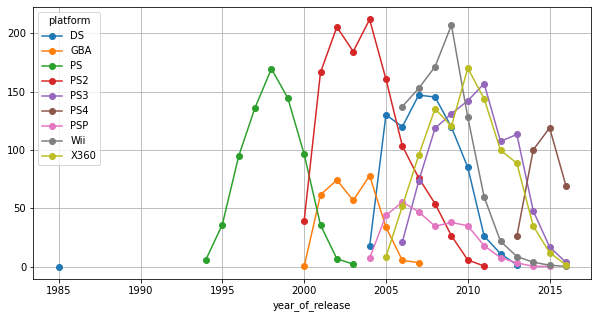

In [33]:
data[filter1 & filter2].pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(style='o-', kind='line', grid=True, figsize=(10,5))

В среднем платформа "живет "10 лет, сейчас у всех наблюдается спад. Для прогноза на следующий год, буду учитывать только игры, выпущенные после 2012 года. Наибольшие продажи были у платформ PS2, Wii, PS.

In [34]:
data_actual = data.query('year_of_release >= 2012')
data_actual

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,999999.0,999999.0,неизвестно,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,999999.0,999999.0,неизвестно,14.60
34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,999999.0,999999.0,неизвестно,0.01
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,999999.0,999999.0,неизвестно,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,999999.0,999999.0,неизвестно,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,999999.0,999999.0,неизвестно,0.01


### 3.2 Потенциально прибыльные платформы.

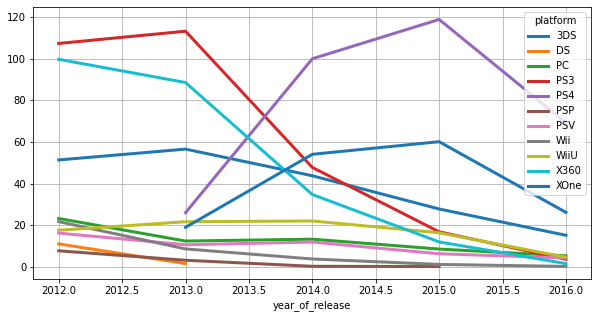

In [35]:
data_actual.query('year_of_release != 2020').pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(style='-', kind='line', lw=3, grid=True, figsize=(10,5))

**У всех платформ падают продажи, но наилучшие позиции на 2016 год у PS4, 3DS, XOne.**

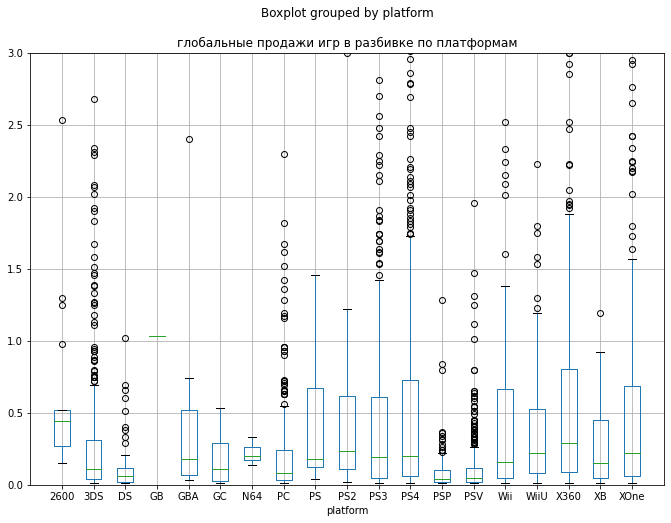

In [36]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(11,8))
data_actual.boxplot(column='total_sales', by='platform', ax=ax)
plt.ylim(0, 3)
plt.xlim(0, 20)
plt.title('глобальные продажи игр в разбивке по платформам');
 

Самые продаваемые игры были у платформ X360, XOne, Wii, PS4, PS3, PS2.

### 3.3 Влияние отзывов пользователей и критиков 

In [37]:
# рассмотрим влияние отзывов на продажи внутри платформы Х360
x360 = data_actual.query('platform == "X360" and critic_score != 999999 and user_score != 999999')
x360

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
35,Call of Duty: Black Ops II,X360,2012.0,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
60,Call of Duty: Ghosts,X360,2013.0,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
66,Halo 4,X360,2012.0,Shooter,6.65,2.28,0.04,0.74,87.0,7.0,M,9.71
176,Assassin's Creed III,X360,2012.0,Action,3.13,1.69,0.03,0.44,84.0,6.7,M,5.29
...,...,...,...,...,...,...,...,...,...,...,...,...
13717,Deadliest Warrior: Ancient Combat,X360,2012.0,Fighting,0.04,0.00,0.00,0.00,37.0,6.3,M,0.04
15074,Capcom Digital Collection,X360,2012.0,Action,0.02,0.01,0.00,0.00,65.0,5.3,T,0.03
15613,The Testament of Sherlock Holmes,X360,2012.0,Adventure,0.00,0.02,0.00,0.00,64.0,7.6,M,0.02
15625,Marvel Avengers: Battle for Earth,X360,2012.0,Action,0.02,0.00,0.00,0.00,62.0,7.3,T,0.02


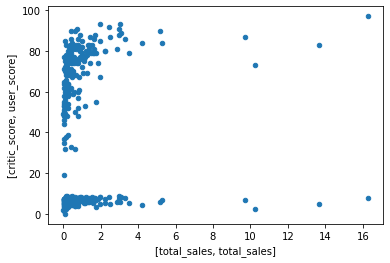

In [38]:
x360.plot(x=['total_sales','total_sales'], y=['critic_score','user_score'], kind='scatter') ;

In [39]:
x360.corr().loc['total_sales', 'critic_score']

0.36684007638788924

In [40]:
x360.corr().loc['total_sales', 'user_score']

0.00820008714121573

Отзывы пользователей практически не оказывают влияние на продажи, отзывы критиков оказывают незначительное влияние на продажи.

Корреляция между отзывами пользователей и критиков для всех платформ.

In [42]:
data_actual_filter = data_actual.query('critic_score != 999999 and user_score != 999999')

In [43]:
data_actual_filter['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'WiiU', 'Wii', 'XOne', 'PS2', 'PC',
       'GBA', 'PSV', 'PSP', 'XB', 'PS', 'DS', 'GC'], dtype=object)

In [44]:
for i in data_actual_filter['platform'].unique():
    print(i, data_actual_filter.loc[data_actual_filter['platform'] == i, ['total_sales', 'user_score']].corr())

PS3              total_sales  user_score
total_sales     1.000000    0.013065
user_score      0.013065    1.000000
X360              total_sales  user_score
total_sales       1.0000      0.0082
user_score        0.0082      1.0000
PS4              total_sales  user_score
total_sales     1.000000   -0.011146
user_score     -0.011146    1.000000
3DS              total_sales  user_score
total_sales     1.000000    0.209813
user_score      0.209813    1.000000
WiiU              total_sales  user_score
total_sales     1.000000    0.366676
user_score      0.366676    1.000000
Wii              total_sales  user_score
total_sales     1.000000    0.363948
user_score      0.363948    1.000000
XOne              total_sales  user_score
total_sales     1.000000   -0.026696
user_score     -0.026696    1.000000
PS2              total_sales  user_score
total_sales     1.000000    0.129267
user_score      0.129267    1.000000
PC              total_sales  user_score
total_sales     1.000000   -0.142057


In [45]:
for i in data_actual_filter['platform'].unique():
    print(i, data_actual_filter.loc[data_actual_filter['platform'] == i, ['total_sales', 'critic_score']].corr())

PS3               total_sales  critic_score
total_sales      1.000000      0.331444
critic_score     0.331444      1.000000
X360               total_sales  critic_score
total_sales       1.00000       0.36684
critic_score      0.36684       1.00000
PS4               total_sales  critic_score
total_sales      1.000000      0.406002
critic_score     0.406002      1.000000
3DS               total_sales  critic_score
total_sales      1.000000      0.323378
critic_score     0.323378      1.000000
WiiU               total_sales  critic_score
total_sales       1.00000       0.34838
critic_score      0.34838       1.00000
Wii               total_sales  critic_score
total_sales      1.000000      0.333522
critic_score     0.333522      1.000000
XOne               total_sales  critic_score
total_sales      1.000000      0.415392
critic_score     0.415392      1.000000
PS2               total_sales  critic_score
total_sales      1.000000      0.573589
critic_score     0.573589      1.000000
PC   

Отзывы пользователей оказывают влияние на продажи (коэффициент > 0.50) только на платформах DS, Wii, PSP, на остальных платформах корреляция незначительная.
Отзывы критиков оказывают влияние на продажи (коэффициент > 0.50) только на платформах DS, PS, PS2, XB, GC, на остальных платформах корреляция незначительная.

In [46]:
data_actual.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.050366,-0.070752,-0.078538,-0.065701,-0.017444,-0.038967,-0.075499
na_sales,-0.050366,1.000000,0.753256,0.259430,0.786129,-0.203209,-0.178454,0.917457
eu_sales,-0.070752,0.753256,1.000000,0.262637,0.933719,-0.195347,-0.170879,0.923561
jp_sales,-0.078538,0.259430,0.262637,1.000000,0.201100,0.038841,0.088889,0.444446
other_sales,-0.065701,0.786129,0.933719,0.201100,1.000000,-0.190613,-0.165566,0.908809
critic_score,-0.017444,-0.203209,-0.195347,0.038841,-0.190613,1.000000,0.778317,-0.189920
user_score,-0.038967,-0.178454,-0.170879,0.088889,-0.165566,0.778317,1.000000,-0.155720
total_sales,-0.075499,0.917457,0.923561,0.444446,0.908809,-0.189920,-0.155720,1.000000


### 3.4 Общее распределение игр по жанрам

In [47]:
data_actual.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

genre
Action          468.77
Shooter         315.82
Sports          202.67
Role-Playing    196.28
Misc             97.26
Platform         63.22
Racing           58.68
Fighting         49.36
Simulation       37.13
Adventure        33.69
Strategy         15.00
Puzzle            7.57
Name: total_sales, dtype: float64

In [48]:
genres = data_actual.pivot_table(index='genre', values='total_sales', aggfunc=['sum', 'count']).reset_index()
a = genres.sort_values(by=('sum', 'total_sales'), ascending=False)
a

,genre,sum,count
,,total_sales,total_sales
0,Action,468.77,1093
8,Shooter,315.82,262
10,Sports,202.67,310
7,Role-Playing,196.28,387
3,Misc,97.26,221
4,Platform,63.22,95
6,Racing,58.68,138
2,Fighting,49.36,121
9,Simulation,37.13,96


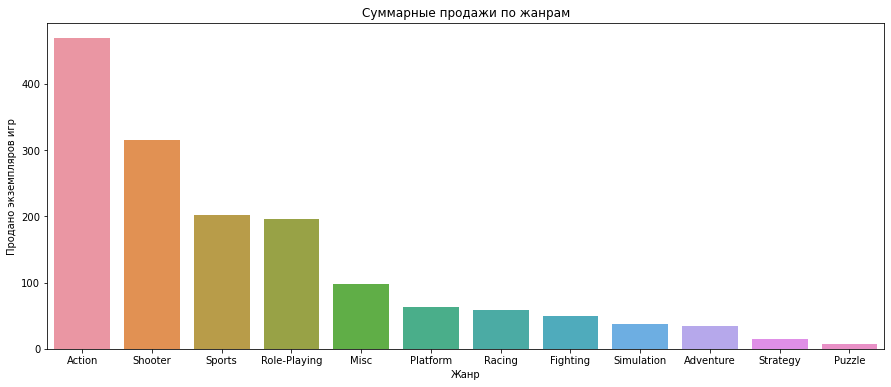

In [49]:
import seaborn as sns
plt.figure(figsize=(15,6))
sns.barplot(data = a, y = a['sum', 'total_sales'], x = a['genre'])
#plt.xticks(objects, rotation=90)
plt.ylabel('Продано экземпляров игр')
plt.xlabel('Жанр')
plt.title('Суммарные продажи по жанрам')

plt.show()

## Вывод

Самый популярный жанр Action и по количеству игр и по общей сумме продаж, далее Shooter, Sports и Role-Playing. Самые непопулярные Puzzle и Strategy.

## 4. Портрет пользователя каждого региона

### 4.1 Северная Америка

In [50]:
# северная Америка
na = data_actual.groupby('platform')['na_sales'].sum().sort_values(ascending=False).reset_index()

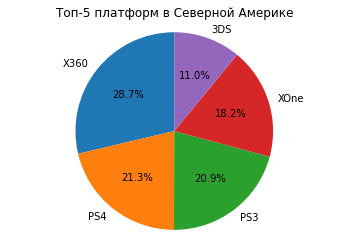

In [51]:
na_labels = na.loc[:4, 'platform']
na_sizes = na.loc[:4, 'na_sales']
fig1, ax1 = plt.subplots() 
ax1.pie(na_sizes, labels=na_labels, autopct='%1.1f%%', startangle=90) 
plt.title('Топ-5 платформ в Северной Америке')
ax1.axis('equal')  
plt.show()

In [52]:
na_genres = data_actual.groupby('genre')['na_sales'].sum().sort_values(ascending=False).reset_index()

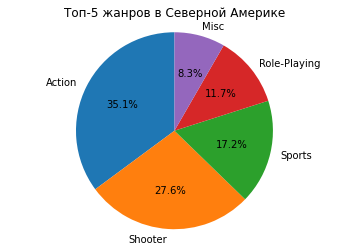

In [53]:
na_labels_g = na_genres.loc[:4, 'genre']
na_sizes_g = na_genres.loc[:4, 'na_sales']
fig1, ax1 = plt.subplots() 
ax1.pie(na_sizes_g, labels=na_labels_g, autopct='%1.1f%%', startangle=90) 
ax1.axis('equal') 
plt.title('Топ-5 жанров в Северной Америке')
plt.show()

In [54]:
data_actual.groupby('rating')['na_sales'].sum().sort_values(ascending=False)

rating
M             237.16
E             133.12
неизвестно    118.15
E10+           83.52
T              78.17
RP              0.00
Name: na_sales, dtype: float64

### 4.2 Европа

In [55]:
# Европа
eu = data_actual.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).reset_index()

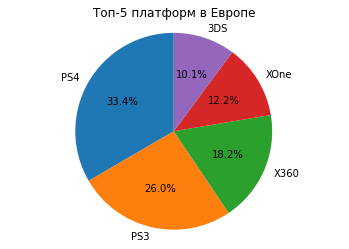

In [56]:
eu_labels = eu.loc[:4, 'platform']
eu_sizes = eu.loc[:4, 'eu_sales']
fig1, ax1 = plt.subplots() 
ax1.pie(eu_sizes, labels=eu_labels, autopct='%1.1f%%', startangle=90) 
plt.title('Топ-5 платформ в Европе')
ax1.axis('equal')  
plt.show()

In [57]:
eu_genres = data_actual.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).reset_index()

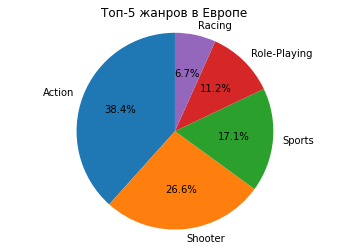

In [58]:
eu_labels_g = eu_genres.loc[:4, 'genre']
eu_sizes_g = eu_genres.loc[:4, 'eu_sales']
fig1, ax1 = plt.subplots() 
ax1.pie(eu_sizes_g, labels=eu_labels_g, autopct='%1.1f%%', startangle=90) 
ax1.axis('equal') 
plt.title('Топ-5 жанров в Европе')
plt.show()

In [59]:
data_actual.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)

rating
M             197.93
E             119.41
неизвестно     95.15
E10+           60.54
T              58.20
RP              0.05
Name: eu_sales, dtype: float64

### 4.3 Япония

In [60]:
# Япония
jp = data_actual.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).reset_index()

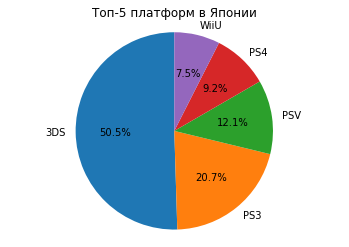

In [61]:
jp_labels = jp.loc[:4, 'platform']
jp_sizes = jp.loc[:4, 'jp_sales']
fig1, ax1 = plt.subplots() 
ax1.pie(jp_sizes, labels=jp_labels, autopct='%1.1f%%', startangle=90) 
plt.title('Топ-5 платформ в Японии')
ax1.axis('equal')  
plt.show()

In [62]:
jp_genres = data_actual.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).reset_index()

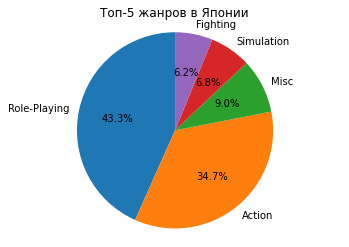

In [63]:
jp_labels_g = jp_genres.loc[:4, 'genre']
jp_sizes_g = jp_genres.loc[:4, 'jp_sales']
fig1, ax1 = plt.subplots() 
ax1.pie(jp_sizes_g, labels=jp_labels_g, autopct='%1.1f%%', startangle=90) 
ax1.axis('equal') 
plt.title('Топ-5 жанров в Японии')
plt.show()

In [64]:
data_actual.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

rating
неизвестно    114.03
E              28.48
T              26.72
M              21.86
E10+            8.19
RP              0.00
Name: jp_sales, dtype: float64

**Вывод**

Рынки в Сев. Америке и Европе схожи, самые популярные платформы Х360, PS3 и PS4, самые популярные жанры Action, Shooter и Sports. Большая часть игр с рейтингом M (от 17 лет), на втором месте Е (от 6 лет). То есть более взрослая категория пользователей. Япония отличается: самая популярная платформа 3DS и самый популярные жанры Role-Playing и Action. На первом месте с игры с неизвестным рейтингом, вероятно в Японии локальная система рейтинга.

# 5. Проверка гипотез

### 5.1 Проверка гипотезы о равенстве средних пользовательских рейтингов платформ Xbox One и PC.

*Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC разные*

*Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.*

In [65]:
# считаю дисперсию, чтобы утверждать о ее равенстве или неравенстве.
np.var(data_actual_filter.loc[data_actual_filter['platform'] == 'XOne', 'user_score'], ddof=1)

2.5183404619332763

In [66]:
np.var(data_actual_filter.loc[data_actual_filter['platform'] == 'PC', 'user_score'], ddof=1)

2.643088616650273

In [67]:
from scipy import stats as st
xbox_one = data_actual_filter.loc[data_actual_filter['platform'] == 'XOne', 'user_score']
pc = data_actual_filter.loc[data_actual_filter['platform'] == 'PC', 'user_score']

alpha = 0.05

results = st.ttest_ind(xbox_one, pc, equal_var = False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.7018873017542024
Не получилось отвергнуть нулевую гипотезу


**Вывод**

Средние пользовательские рейтинги платформ Xbox One и PC разные

### 5.2 Проверка гипотезы о равенстве средних пользовательских рейтингов жанров Action и Sports.

*Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports одинаковые.*

*Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные.*

In [68]:
# считаю дисперсию, чтобы утверждать о ее равенстве или неравенстве.
np.var(data_actual_filter.loc[data_actual_filter['genre'] == 'Action', 'user_score'], ddof=1)

2.6424436891731546

In [69]:
np.var(data_actual_filter.loc[data_actual_filter['genre'] == 'Sports', 'user_score'], ddof=1)

3.5270591715976325

In [70]:
action_genre = data_actual_filter.loc[data_actual_filter['genre'] == 'Action', 'user_score']
sports_genre = data_actual_filter.loc[data_actual_filter['genre'] == 'Sports', 'user_score']

alpha = 0.05

results = st.ttest_ind(action_genre, sports_genre, equal_var = False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 6.3917719635936045e-09
Отвергаем нулевую гипотезу


**Вывод**

Не смотря на то, что игры в жанрах Action и Sports в тройке самых популярных, их средние пользовательские рейтинги разные.

# Общий вывод

В следующем году ожидается наибольший спрос на игры на платформах PS4, 3DS, XOne и PS4 в жанрах Action, Shooter, Sports (для Европы и Северной Америки) с рейтингами М и Е и Role-Playing и Action (для Японии) с локальными рейтингами.